In [1]:
import os
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk


In [2]:
os.chdir("..")


--------------------------------

In [3]:
print(os.getcwd())
df = pd.read_csv("reuters_articles_with_split.csv")
topics = str(df["topics"])
topics

/home/riccardodandrea/Schreibtisch/Github/ReutersNOZ


'0                                      cocoa\n1                                        NaN\n2                                        NaN\n3                                        NaN\n4        grain,wheat,corn,barley,oat,sorghum\n                        ...                 \n19038                                   ship\n19039                                    ipi\n19040                                   gold\n19041                                    NaN\n19042                                    NaN\nName: topics, Length: 19043, dtype: object'

In [4]:
import nltk
import os

# Manuell den Pfad zu nltk_data setzen
nltk.data.path.append("nltk_data")

# Jetzt sollten die Ressourcen gefunden werden
nltk.download('stopwords', download_dir="nltk_data")
#nltk.download('punkt', download_dir="nltk_data")
nltk.download('punkt_tab', download_dir="nltk_data")

[nltk_data] Downloading package stopwords to nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#Settings

language="english"
sample_text=topics
stop_words=set(stopwords.words(language))

In [6]:
from nltk.tokenize import PunktTokenizer
print("")
tokenized_sent=sent_tokenize(sample_text)
print("Sentences", tokenized_sent)
print("Number of Sentences:",len(tokenized_sent))
print("")


Sentences ['0                                      cocoa\n1                                        NaN\n2                                        NaN\n3                                        NaN\n4        grain,wheat,corn,barley,oat,sorghum\n                        ...                 \n19038                                   ship\n19039                                    ipi\n19040                                   gold\n19041                                    NaN\n19042                                    NaN\nName: topics, Length: 19043, dtype: object']
Number of Sentences: 1



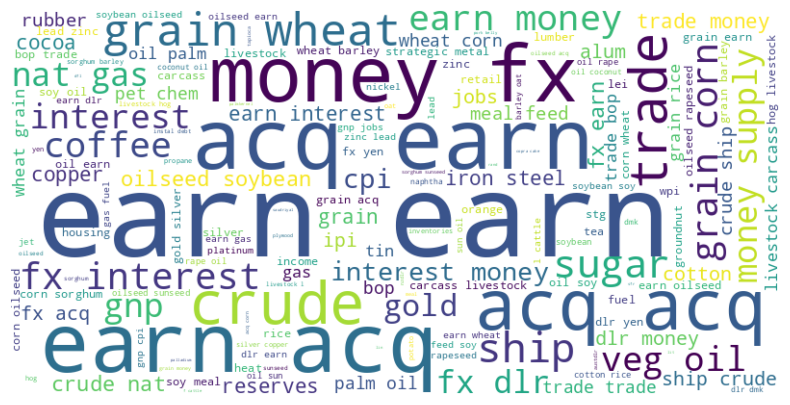

In [7]:

# Alle Topics aus dem DataFrame als String zusammenfügen
all_topics = ' '.join(df["topics"].dropna())  # NaN-Werte vermeiden

# Erstellen der WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_topics)

# Plotten der WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Keine Achsen anzeigen
plt.savefig("topic_freq", dpi=300)


In [8]:
# Alle Topics in einer Liste speichern
topic_list = ' '.join(df["topics"].dropna()).split()  # Entfernt NaN und splittet Wörter

# Wortfrequenz zählen
word_counts = Counter(topic_list)

# Die 10 häufigsten Wörter ausgeben
print(word_counts.most_common())


[('earn', 3735), ('acq', 2125), ('crude', 355), ('trade', 333), ('money-fx', 259), ('interest', 211), ('ship', 156), ('grain,wheat', 139), ('sugar', 135), ('money-fx,interest', 130), ('coffee', 114), ('gold', 99), ('money-supply', 97), ('grain,corn', 78), ('gnp', 73), ('cpi', 68), ('money-fx,dlr', 61), ('cocoa', 55), ('copper', 54), ('crude,nat-gas', 52), ('jobs', 48), ('iron-steel', 46), ('grain', 45), ('alum', 45), ('crude,ship', 45), ('reserves', 42), ('nat-gas', 42), ('ipi', 41), ('rubber', 39), ('veg-oil', 37), ('tin', 30), ('dlr,money-fx', 28), ('interest,money-fx', 27), ('ship,crude', 27), ('cotton', 26), ('trade,bop', 26), ('money-fx,dlr,yen', 26), ('grain,rice', 25), ('oilseed,soybean', 24), ('bop', 24), ('wpi', 23), ('veg-oil,palm-oil', 22), ('gas', 22), ('livestock,carcass', 21), ('pet-chem', 21), ('livestock', 20), ('strategic-metal', 19), ('retail', 18), ('orange', 18), ('bop,trade', 18), ('grain,wheat,corn', 18), ('oilseed,rapeseed', 17), ('wheat,grain', 15), ('housing', 